In [3]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import os

In [4]:
dtime = datetime(2019, 4, 30, 00)
dtimestamp = datetime.timestamp(dtime)
ms = int(round(dtimestamp * 1000))
n_it = 100
granularity = 10 #seconds

In [5]:
def generate_scarsity(length, num_series, scarsity_percentage):
	time_series_data = []
	for _ in range(num_series):
		# Ensure the scarsity percentage is between 0 and 100
		scarsity_percentage = max(0, min(100, scarsity_percentage))
		
		time_series = []
		previous_value = random.uniform(0, 1)  # Initialize the first value randomly
		
		for _ in range(length):
			if random.randint(0, 100) <= scarsity_percentage:
				current_value = None 
			else:
				# Generate a new random value
				current_value = random.uniform(0, 1)
			time_series.append(current_value)
			previous_value = current_value
		time_series_data.append(time_series)
	return time_series_data
    
def generate_delta(length, num_series, delta_percentage):
	time_series_data = []
	for _ in range(num_series):
		delta_percentage = max(0, min(100, delta_percentage))
		time_series = []
		previous_value = random.uniform(0, 1)  # Initialize the first value randomly
		for _ in range(length):
			delta = random.uniform(-1 * delta_percentage, delta_percentage )  
			current_value = previous_value + delta
			time_series.append(current_value)
			previous_value = current_value
		time_series_data.append(time_series)
	return time_series_data
    
def export(ts, file):
	try:
		os.mkdir("../datasets/compression/")
	except FileExistsError:
		pass
	df = pd.DataFrame(ts).T
	df['time'] = [datetime.fromtimestamp((ms + i * 1000 * granularity) // 1000).strftime("%Y-%m-%dT%H:%M:%S") for i in range(len(df))] #2019-03-01T00:00:00
	df['st'] = ['st' + str(i // (len(df) // 10)) for i in range(len(df))] 
	df = df[ ['time'] + ['st'] + [ col for col in df.columns if col != 'time' and col != 'st' ] ]
	col_names = list(df.columns)
	df.columns = col_names[:2] + [ "s"+str(id) for id in col_names[2:]]
	df = df.rename(columns={'st': 'id_station'})
	df.to_csv("../datasets/compression/"+file, index=False)
	print(df)
	return df

def generate_repeats(length, num_series, repeats_percentage):
	time_series_data = []
	for _ in range(num_series):
		# Ensure the repeats percentage is between 0 and 100
		repeats_percentage = max(0, min(100, repeats_percentage))
		
		time_series = []
		previous_value = random.uniform(0, 1)  # Initialize the first value randomly
		
		for _ in range(length):
			if random.randint(0, 100) < repeats_percentage:
				current_value = previous_value 
			else:
				# Generate a new random value
				current_value = random.uniform(0, 1)
			
			# Ensure the generated value stays within the [0, 1] range
			current_value = max(0, min(1, current_value))
			
			time_series.append(current_value)
			previous_value = current_value
		time_series_data.append(time_series)
	return time_series_data

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.285600  0.208921  0.300615  0.702455   
1    2019-04-30T00:00:10        st0  0.407094  0.608298  0.878759  0.788878   
2    2019-04-30T00:00:20        st0  0.187162  0.045037  0.990432  0.273257   
3    2019-04-30T00:00:30        st0  0.225773  0.045037  0.353643  0.935340   
4    2019-04-30T00:00:40        st0  0.799043  0.510054  0.581972  0.629264   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.275514  0.503208  0.821857  0.005438   
996  2019-04-30T02:46:00        st9  0.034449  0.377033  0.448966  0.850914   
997  2019-04-30T02:46:10        st9  0.034449  0.535721  0.448966  0.837899   
998  2019-04-30T02:46:20        st9  0.498911  0.535721  0.448966  0.228816   
999  2019-04-30T02:46:30        st9  0.483021  0.157847  0.808556  0.555116   

           s4        s5        s6        s7  ...   

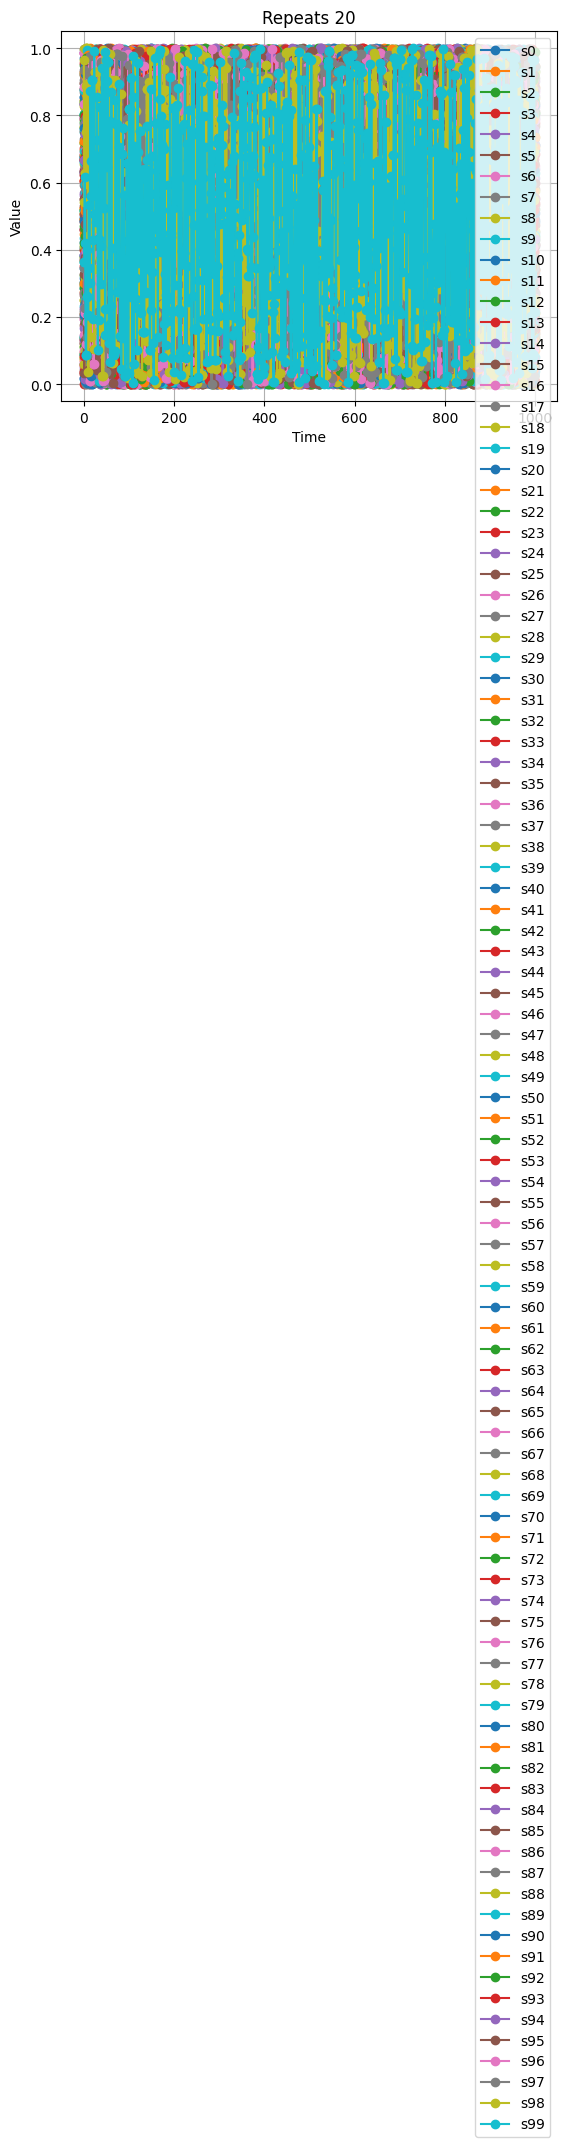

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.423598  0.940324  0.961584  0.619985   
1    2019-04-30T00:00:10        st0  0.897365  0.069606  0.961584  0.619985   
2    2019-04-30T00:00:20        st0  0.518333  0.069606  0.641594  0.619985   
3    2019-04-30T00:00:30        st0  0.518333  0.069606  0.051658  0.619985   
4    2019-04-30T00:00:40        st0  0.257703  0.510965  0.804227  0.619985   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.175974  0.083542  0.173448  0.719568   
996  2019-04-30T02:46:00        st9  0.175974  0.083542  0.864902  0.719568   
997  2019-04-30T02:46:10        st9  0.175974  0.869857  0.022027  0.719568   
998  2019-04-30T02:46:20        st9  0.175974  0.751657  0.022027  0.719568   
999  2019-04-30T02:46:30        st9  0.175974  0.751657  0.274183  0.719568   

           s4       s5        s6        s7  ...    

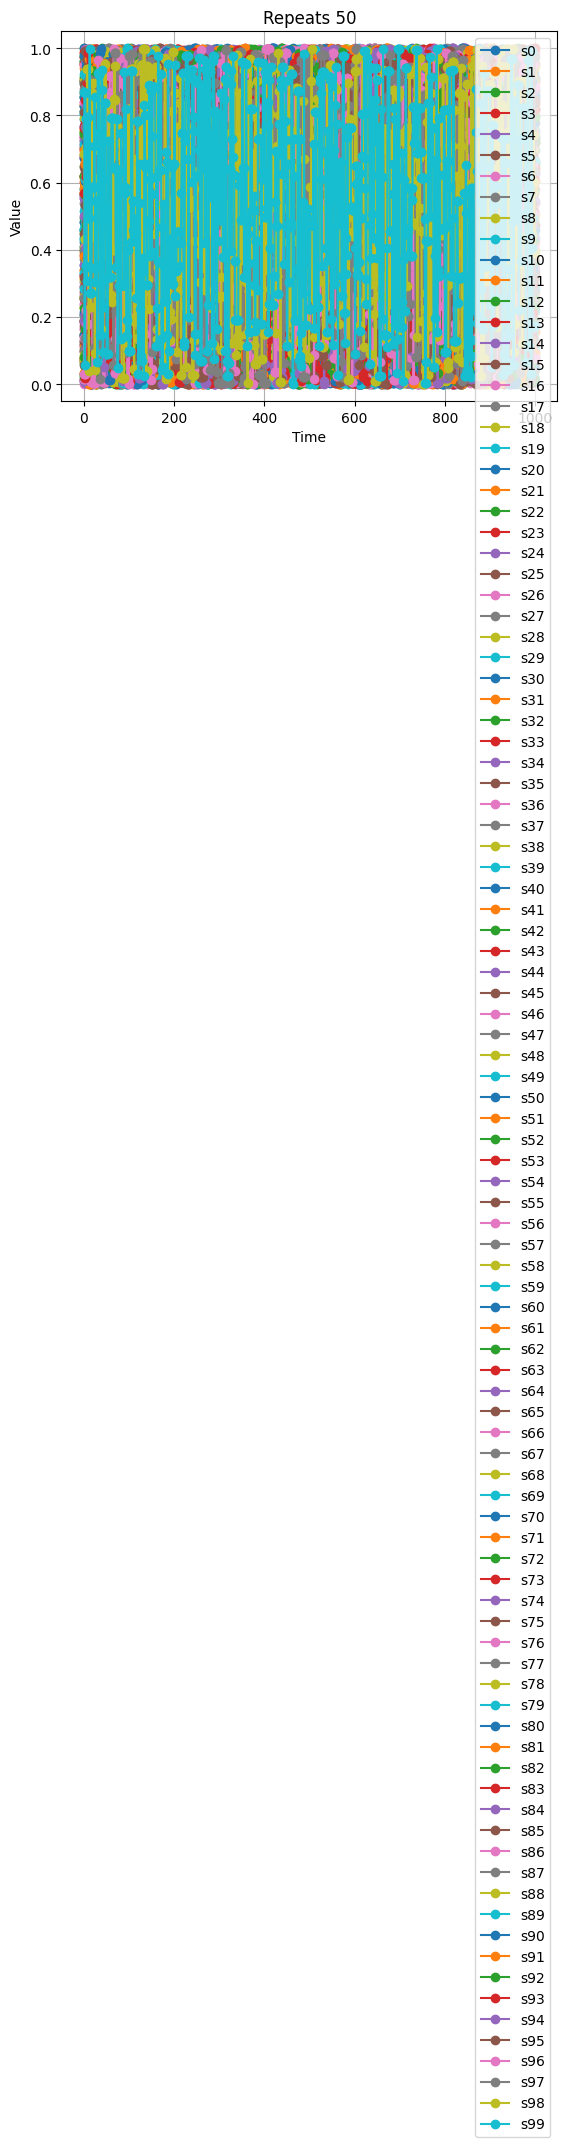

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.524542  0.552793  0.851045  0.644420   
1    2019-04-30T00:00:10        st0  0.524542  0.552793  0.851045  0.644420   
2    2019-04-30T00:00:20        st0  0.524542  0.552793  0.851045  0.644420   
3    2019-04-30T00:00:30        st0  0.618452  0.552793  0.851045  0.644420   
4    2019-04-30T00:00:40        st0  0.618452  0.552793  0.851045  0.644420   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.548442  0.440218  0.757673  0.788296   
996  2019-04-30T02:46:00        st9  0.706140  0.440218  0.757673  0.788296   
997  2019-04-30T02:46:10        st9  0.706140  0.440218  0.757673  0.788296   
998  2019-04-30T02:46:20        st9  0.078611  0.440218  0.757673  0.726016   
999  2019-04-30T02:46:30        st9  0.078611  0.440218  0.757673  0.726016   

           s4        s5        s6        s7  ...   

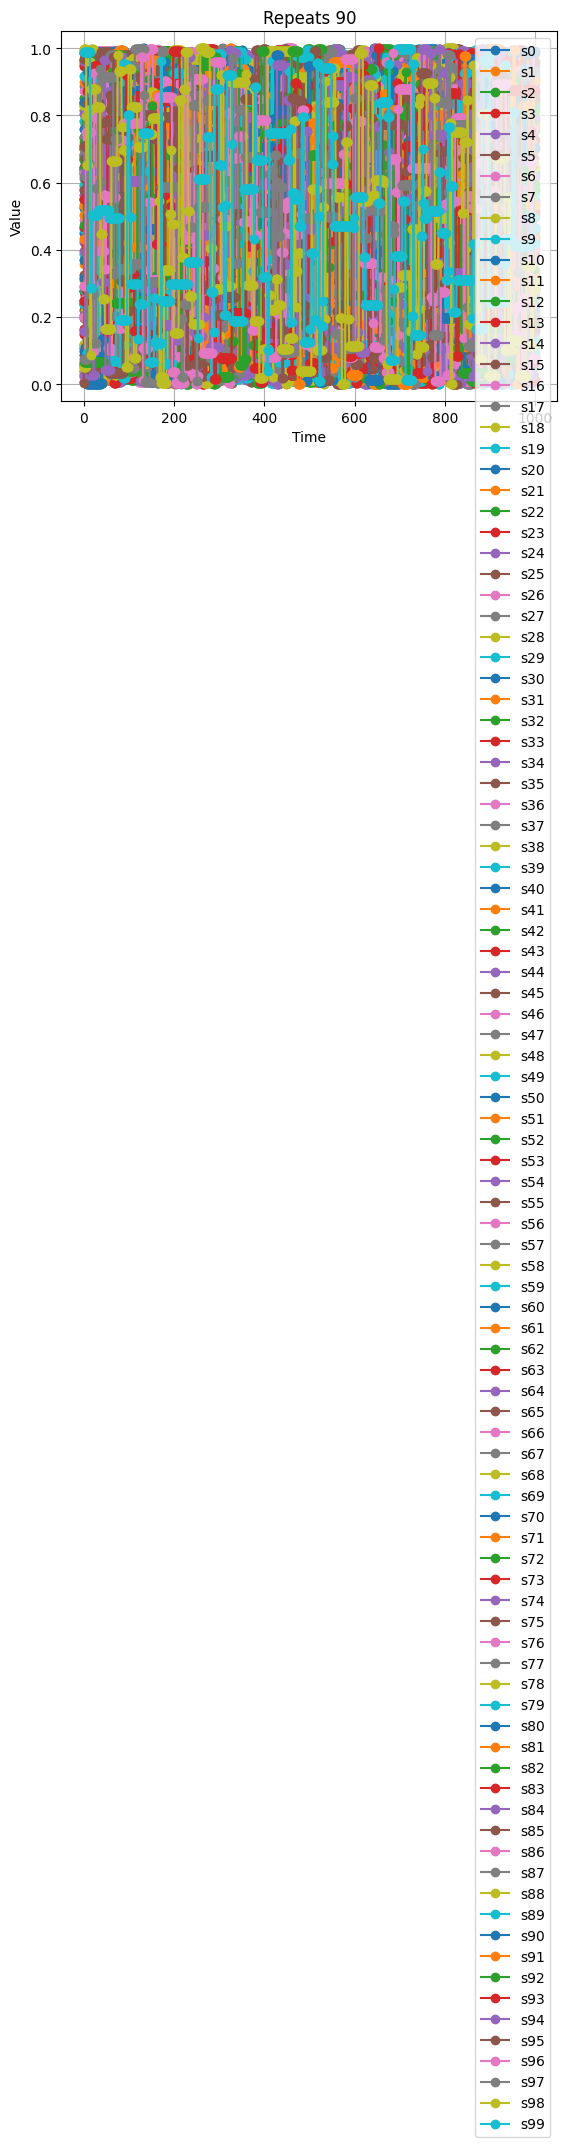

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.563525  0.020248  0.562078  0.392985   
1    2019-04-30T00:00:10        st0  0.842637  0.831640  0.464132  0.056111   
2    2019-04-30T00:00:20        st0  0.182847  0.659054  0.796295       NaN   
3    2019-04-30T00:00:30        st0  0.344568  0.578592  0.731416  0.950932   
4    2019-04-30T00:00:40        st0       NaN  0.068896  0.658425  0.024336   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.914803  0.180908  0.733739  0.195749   
996  2019-04-30T02:46:00        st9  0.292881       NaN       NaN  0.152679   
997  2019-04-30T02:46:10        st9  0.193094  0.164937  0.796353  0.315044   
998  2019-04-30T02:46:20        st9  0.753232  0.373378       NaN  0.436400   
999  2019-04-30T02:46:30        st9  0.377564  0.666889  0.068553  0.169586   

           s4        s5        s6        s7  ...   

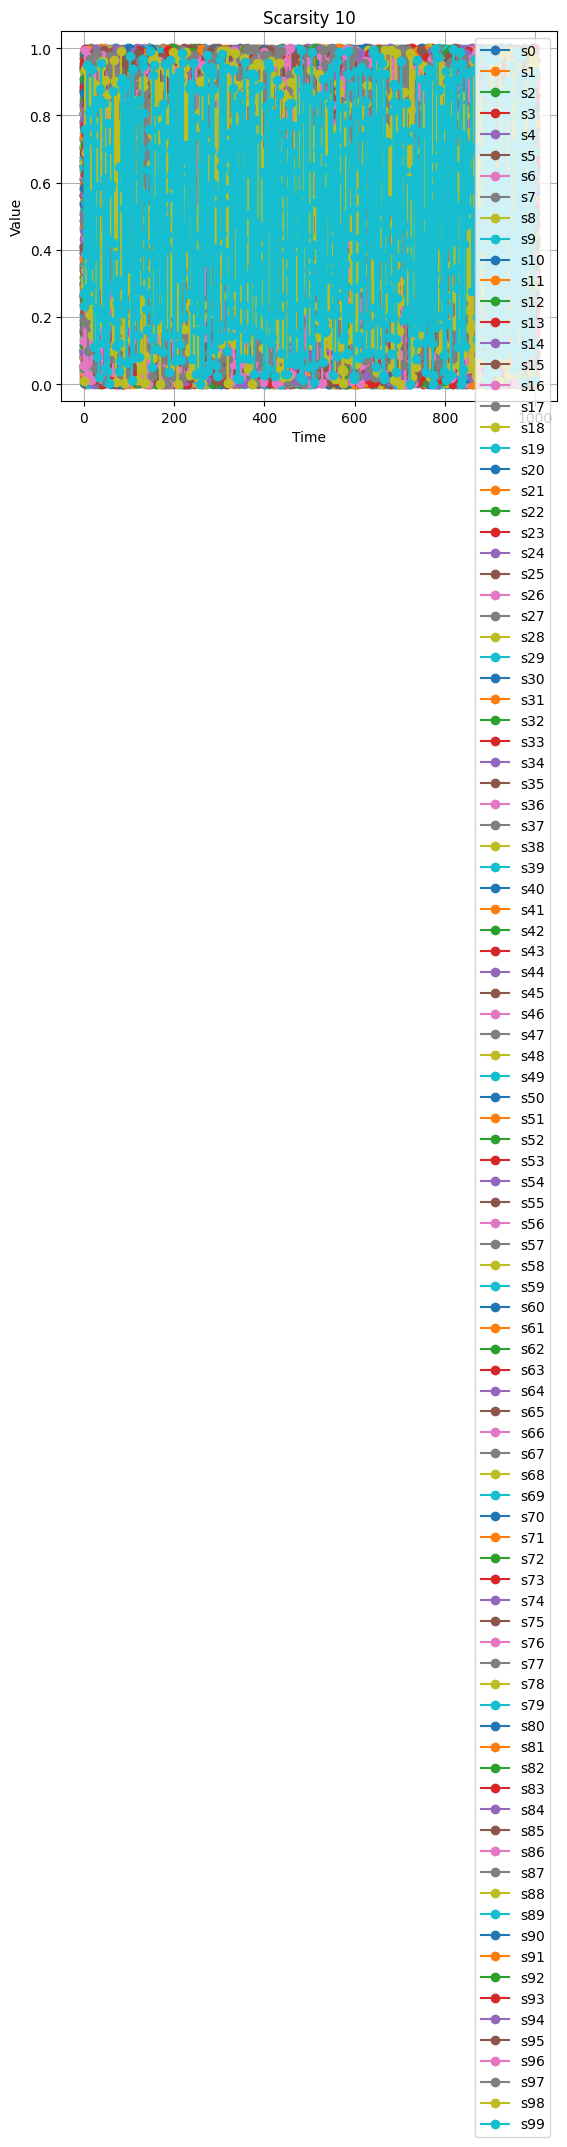

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.632749       NaN  0.967579  0.843778   
1    2019-04-30T00:00:10        st0  0.518692  0.484407       NaN  0.201336   
2    2019-04-30T00:00:20        st0  0.574005  0.866307  0.349860  0.606792   
3    2019-04-30T00:00:30        st0  0.635045       NaN  0.235504  0.026030   
4    2019-04-30T00:00:40        st0       NaN  0.656984       NaN  0.529868   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.208505       NaN  0.959954  0.237884   
996  2019-04-30T02:46:00        st9  0.714502       NaN  0.343137  0.201310   
997  2019-04-30T02:46:10        st9  0.784079  0.664489  0.577175  0.528694   
998  2019-04-30T02:46:20        st9  0.603072       NaN  0.504796       NaN   
999  2019-04-30T02:46:30        st9  0.255915       NaN       NaN  0.631327   

           s4        s5        s6        s7  ...   

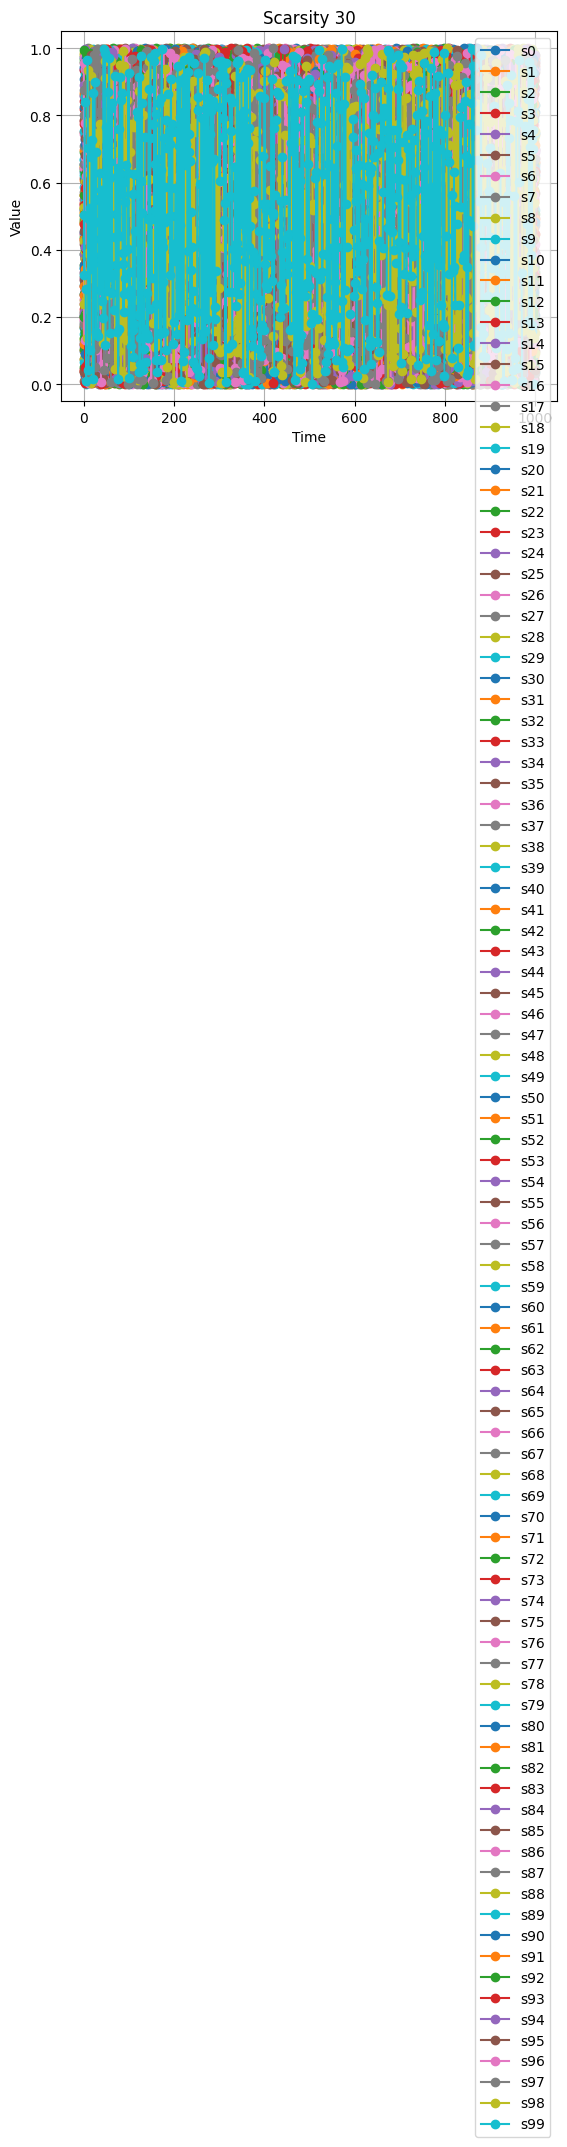

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0       NaN  0.022188  0.276441  0.654325   
1    2019-04-30T00:00:10        st0  0.850454  0.802475  0.492133  0.507981   
2    2019-04-30T00:00:20        st0  0.598235  0.262113       NaN  0.362911   
3    2019-04-30T00:00:30        st0       NaN  0.291649  0.130793       NaN   
4    2019-04-30T00:00:40        st0       NaN  0.269195  0.833900  0.476670   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.520176  0.200007       NaN  0.433493   
996  2019-04-30T02:46:00        st9       NaN       NaN       NaN       NaN   
997  2019-04-30T02:46:10        st9       NaN  0.171958  0.883807  0.234020   
998  2019-04-30T02:46:20        st9  0.228339  0.052479  0.962558       NaN   
999  2019-04-30T02:46:30        st9       NaN  0.520025  0.686925  0.733120   

           s4        s5        s6        s7  ...   

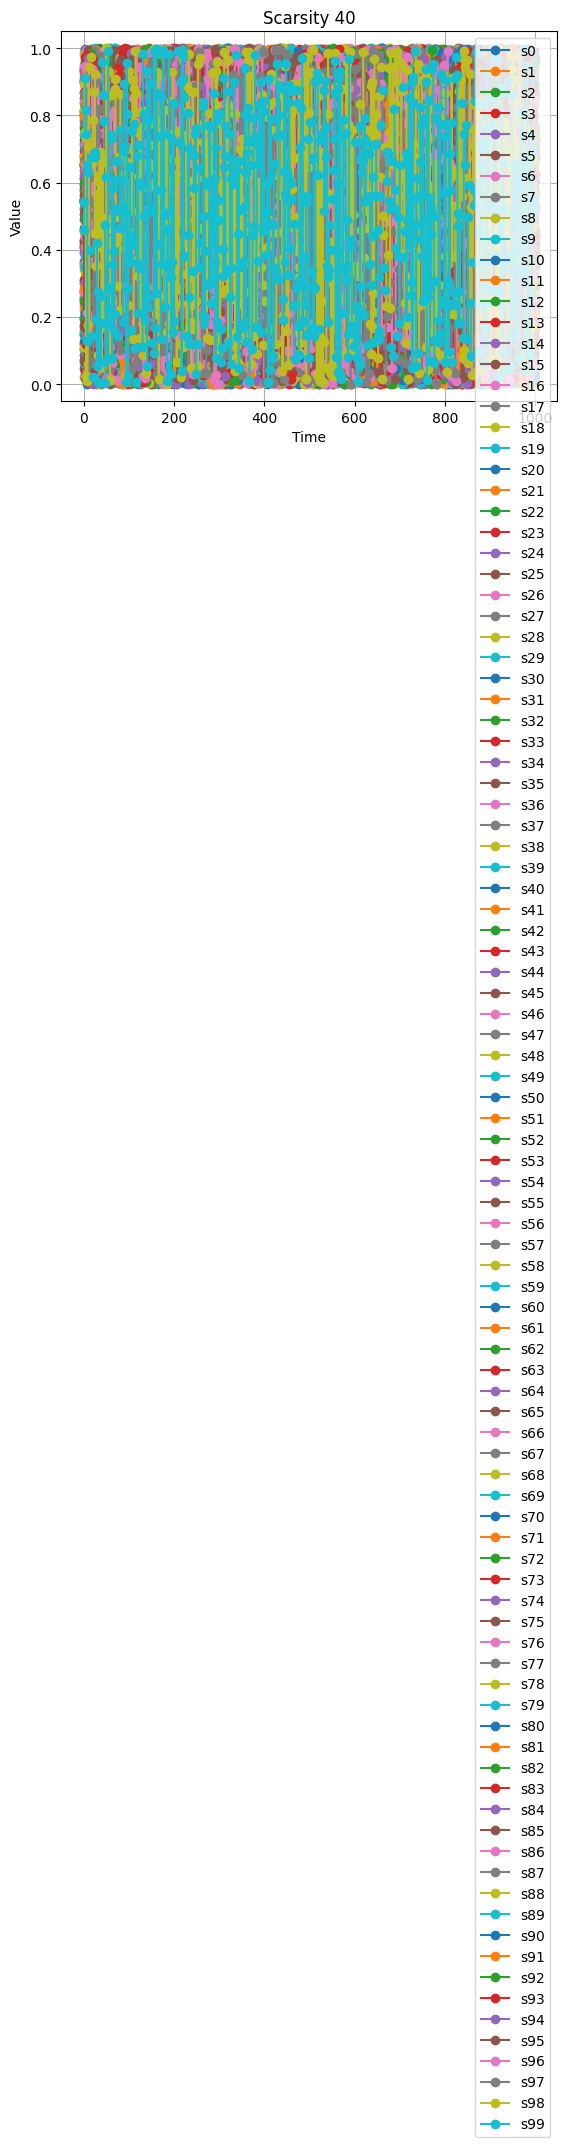

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0       NaN       NaN       NaN       NaN   
1    2019-04-30T00:00:10        st0       NaN       NaN       NaN       NaN   
2    2019-04-30T00:00:20        st0       NaN       NaN       NaN       NaN   
3    2019-04-30T00:00:30        st0       NaN       NaN  0.734887       NaN   
4    2019-04-30T00:00:40        st0       NaN       NaN       NaN       NaN   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.214960       NaN  0.180702       NaN   
996  2019-04-30T02:46:00        st9       NaN       NaN  0.300405       NaN   
997  2019-04-30T02:46:10        st9       NaN       NaN  0.825211  0.264962   
998  2019-04-30T02:46:20        st9       NaN  0.995008       NaN       NaN   
999  2019-04-30T02:46:30        st9  0.364298       NaN       NaN  0.837798   

           s4        s5        s6        s7  ...   

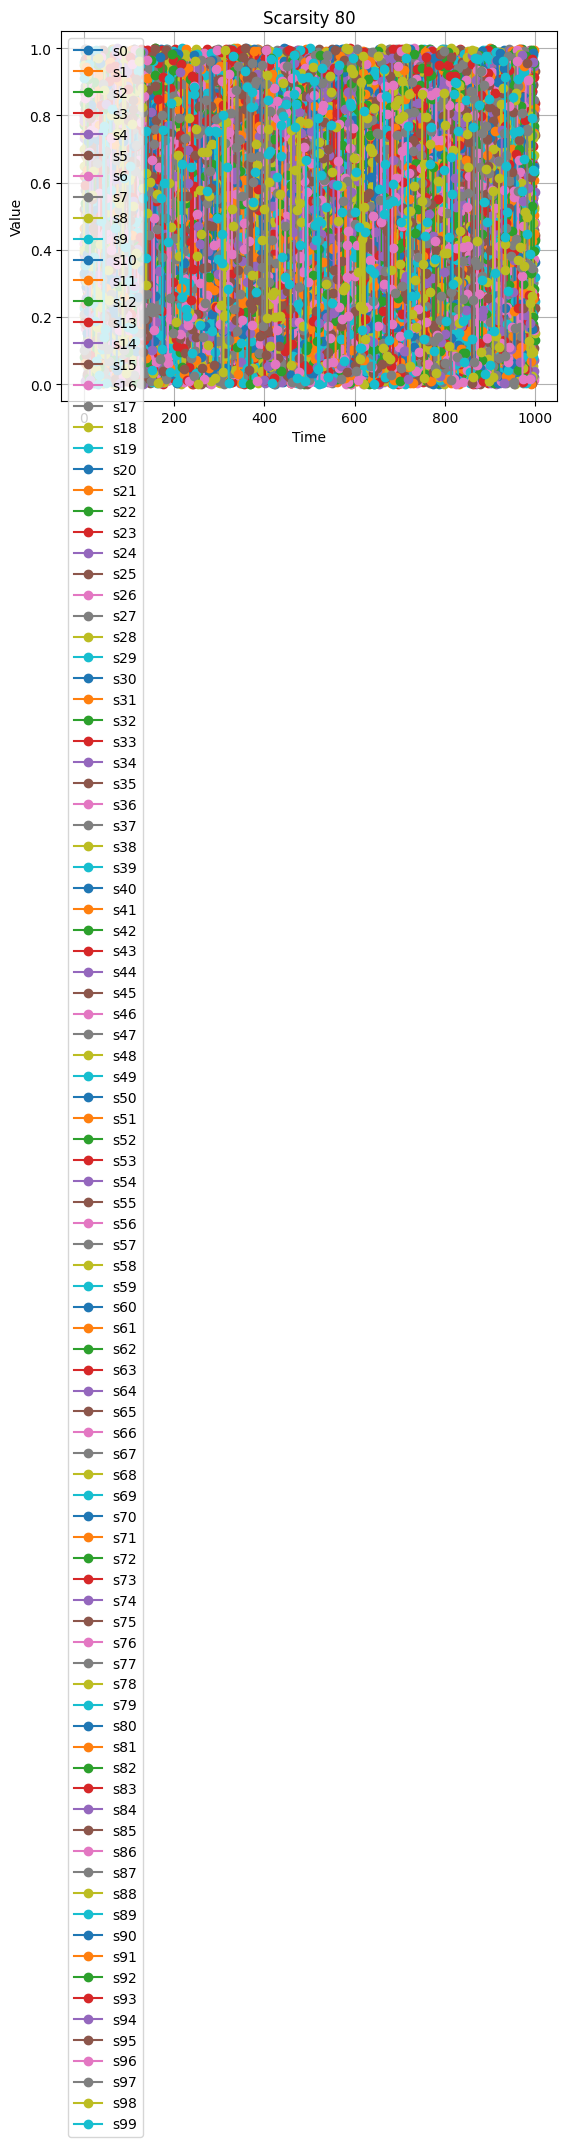

                    time id_station    s0    s1    s2    s3    s4    s5    s6  \
0    2019-04-30T00:00:00        st0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1    2019-04-30T00:00:10        st0  None  None  None  None  None  None  None   
2    2019-04-30T00:00:20        st0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3    2019-04-30T00:00:30        st0  None  None  None  None  None  None  None   
4    2019-04-30T00:00:40        st0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
..                   ...        ...   ...   ...   ...   ...   ...   ...   ...   
995  2019-04-30T02:45:50        st9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
996  2019-04-30T02:46:00        st9  None  None  None  None  None  None  None   
997  2019-04-30T02:46:10        st9  None  None  None  None  None  None  None   
998  2019-04-30T02:46:20        st9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
999  2019-04-30T02:46:30        st9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       s7  ...   s90   s91 

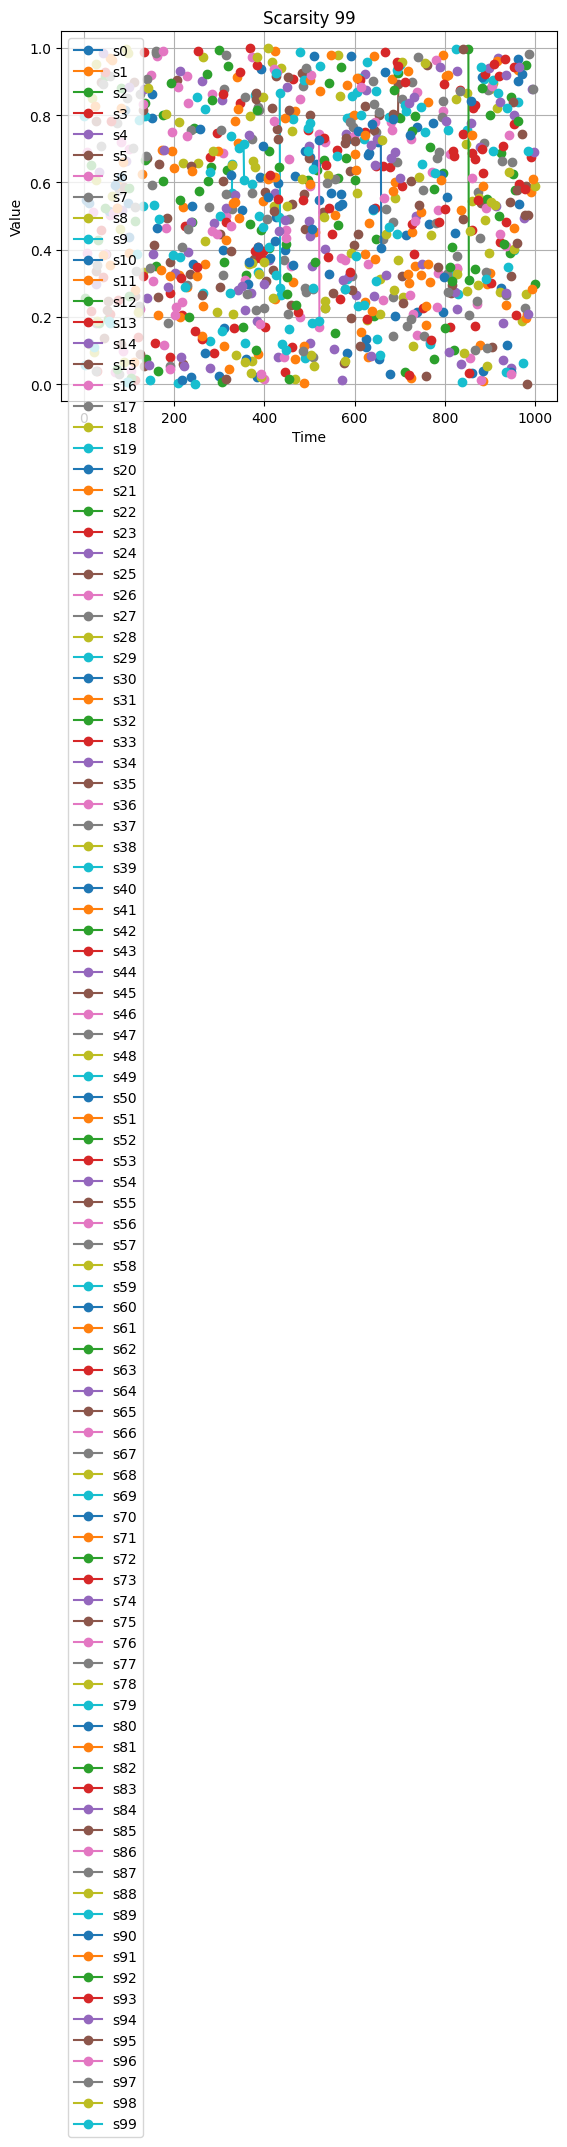

In [6]:
length=1000
num_series = 100
repeats_percentage=20
scarsity_percentage=50
delta_percentage=1

time_series_data = generate_repeats(length, num_series, repeats_percentage)
time_series_data = export(time_series_data, 'repeats_'+str(repeats_percentage)+'.csv')
# Plot the time series
time_series_data.plot(marker='o', linestyle='-')
plt.title('Repeats ' + str(repeats_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

repeats_percentage=50
time_series_data = generate_repeats(length, num_series, repeats_percentage)
time_series_data = export(time_series_data, 'repeats_'+str(repeats_percentage)+'.csv')
# Plot the time series
time_series_data.plot(marker='o', linestyle='-')
plt.title('Repeats ' + str(repeats_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

repeats_percentage=90
time_series_data = generate_repeats(length, num_series, repeats_percentage)
time_series_data = export(time_series_data, 'repeats_'+str(repeats_percentage)+'.csv')
# Plot the time series
time_series_data.plot(marker='o', linestyle='-')
plt.title('Repeats ' + str(repeats_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# time_series_data = generate_repeats(length, num_series, repeats_percentage)
# time_series_data = export(time_series_data, 'repeats_'+str(repeats_percentage)+'.csv')
# # Plot the time series
# time_series_data.plot(marker='o', linestyle='-')
# plt.title('Repeats ' + str(repeats_percentage) )
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.grid(True)
# plt.show()

scarsity_percentage = 10
time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
time_series_data.plot(marker='o', linestyle='-')
plt.title('Scarsity ' + str(scarsity_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

scarsity_percentage = 30
time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
time_series_data.plot(marker='o', linestyle='-')
plt.title('Scarsity ' + str(scarsity_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

scarsity_percentage = 40
time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
time_series_data.plot(marker='o', linestyle='-')
plt.title('Scarsity ' + str(scarsity_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

scarsity_percentage = 80
time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
time_series_data.plot(marker='o', linestyle='-')
plt.title('Scarsity ' + str(scarsity_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

scarsity_percentage = 99
time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
time_series_data.plot(marker='o', linestyle='-')
plt.title('Scarsity ' + str(scarsity_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# time_series_data = generate_delta(length, num_series, delta_percentage)
# time_series_data = export(time_series_data, 'delta_'+str(delta_percentage)+'.csv')
# time_series_data.plot(marker='o', linestyle='-')
# plt.title('Delta ' + str(delta_percentage) )
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.grid(True)
# plt.show()

In [7]:
os.listdir()

['basic_queries_remote_d1_Partition.ipynb',
 'udfs',
 'compatible_compression.ipynb',
 'basic_queries_remote_d1_Layout.ipynb',
 'oq',
 'basic_queries_remote_d2.ipynb',
 'sq',
 'basic_queries_remote_d2_runAll.ipynb',
 'basic_queries_remote_d2_runAll_varyParams.ipynb',
 'complex_queries_remote_runALL.ipynb',
 'TSM_Technical_Report.pdf',
 '.ipynb_checkpoints',
 'complex_queries_remote.ipynb',
 'complex_queries_remote_runALL_d1.ipynb',
 'basic_queries_remote_d1_runAll.ipynb',
 'extra']